In [1]:
from fbprophet import Prophet
import pandas as pd
from math import sin, pi, isnan
from random import gauss, random
from statistics import mean
import numpy as np

Importing plotly failed. Interactive plots will not work.


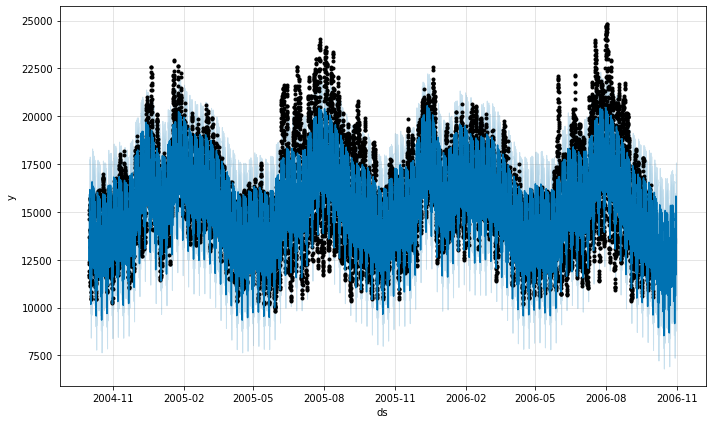

In [2]:
# download data
df = pd.read_csv('https://github.com/khsieh18/Time-Series/raw/master/AEP_hourly.csv')
# rename columns, Prophet expects ds and y
df.columns = ['ds', 'y']
df['ds'] = df['ds'].astype('datetime64[ns]')
# keep training data
training_days = 2*365
forecast_days = 30
df = df.sort_values(['ds']).head((training_days + forecast_days) * 24)
df.index = np.arange(0, len(df))
# wipe target variable y for to-be-forecasted section
for i, row in df.iterrows():
    if i >= training_days * 24:
        df.at[i, 'y'] = None
df_train = df.dropna()
# train model
model = Prophet(yearly_seasonality=True)
model.fit(df_train)
# forecast
df_predict = df[['ds']]
df_predict = model.predict(df_predict)[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
fig = model.plot(df_predict)

In [3]:
# download data
df = pd.read_csv('https://github.com/khsieh18/Time-Series/raw/master/AEP_hourly.csv')
# rename columns, Prophet expects ds and y
df.columns = ['ds', 'y']
df['ds'] = df['ds'].astype('datetime64[ns]')
# keep training data
training_days = 2*365
forecast_days = 30
df = df.sort_values(['ds']).head((training_days + forecast_days) * 24)
df.index = np.arange(0, len(df))
# save ground truth
df['gt'] = df['y']
# wipe target variable y for to-be-forecasted section
for i, row in df.iterrows():
    if i >= training_days * 24:
        df.at[i, 'y'] = None
df_train = df.dropna()
# train model
model = Prophet(yearly_seasonality=True)
model.fit(df_train)
# forecast
df_predict = df[['ds']]
df_predict = model.predict(df_predict)[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
# join train and predict
df_cross = df.tail(forecast_days*24).merge(right=df_predict, on='ds', suffixes=['', '_predict'])
df_cross = df_cross[['ds', 'gt', 'yhat']]
mape = mean([2 * abs((row['gt'] - row['yhat']) / (row['gt'] + row['yhat']))
             for _, row in df_cross.iterrows()])
print('MAPE = %.3f' % mape)

MAPE = 0.120


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


MAPE = 0.000


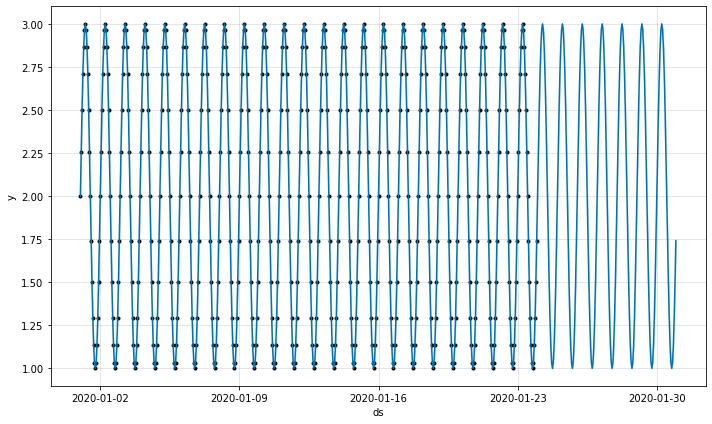

In [4]:
forecast_days = 7
df = pd.DataFrame({'ds': pd.date_range('2020-01-01', '2020-01-31', freq='1H', closed='left')})
df['y'] = 2.0

spectrum = [1]

def f(i, row, period_day=1):
    c = 2 * pi / (period_day * 24)
    return sin(c * i)

for i, row in df.iterrows():
    gt = row['y'] + sum([f(i, row, period) for period in spectrum])
    if i < len(df) - forecast_days * 24:
        y = gt
    else:
        y = None
    df.at[i, 'y'] = y
    df.at[i, 'gt'] = gt

df_train = df.dropna()

model = Prophet()
model.fit(df_train)

df_predict = df[['ds']]
df_predict = model.predict(df_predict)[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

df_cross = df.tail(forecast_days*24).merge(right=df_predict, on='ds', suffixes=['', '_predict'])
df_cross = df_cross[['ds', 'gt', 'yhat']]

mape = mean([2 * abs((row['gt'] - row['yhat']) / (row['gt'] + row['yhat']))
             for _, row in df_cross.iterrows()])
print('MAPE = %.3f' % mape)

fig = model.plot(df_predict)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


MAPE = 0.002


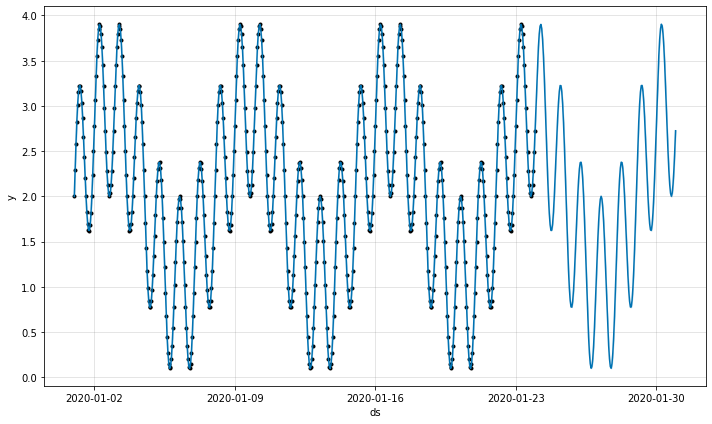

In [5]:
forecast_days = 7
df = pd.DataFrame({'ds': pd.date_range('2020-01-01', '2020-01-31', freq='1H', closed='left')})
df['y'] = 2.0

spectrum = [1, 7]

def f(i, row, period_day=1):
    c = 2 * pi / (period_day * 24)
    return sin(c * i)

for i, row in df.iterrows():
    gt = row['y'] + sum([f(i, row, period) for period in spectrum])
    if i < len(df) - forecast_days * 24:
        y = gt
    else:
        y = None
    df.at[i, 'y'] = y
    df.at[i, 'gt'] = gt

df_train = df.dropna()

model = Prophet()
model.fit(df_train)

df_predict = df[['ds']]
df_predict = model.predict(df_predict)[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

df_cross = df.tail(forecast_days*24).merge(right=df_predict, on='ds', suffixes=['', '_predict'])
df_cross = df_cross[['ds', 'gt', 'yhat']]

mape = mean([2 * abs((row['gt'] - row['yhat']) / (row['gt'] + row['yhat']))
             for _, row in df_cross.iterrows()])
print('MAPE = %.3f' % mape)

fig = model.plot(df_predict)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


MAPE = 0.962


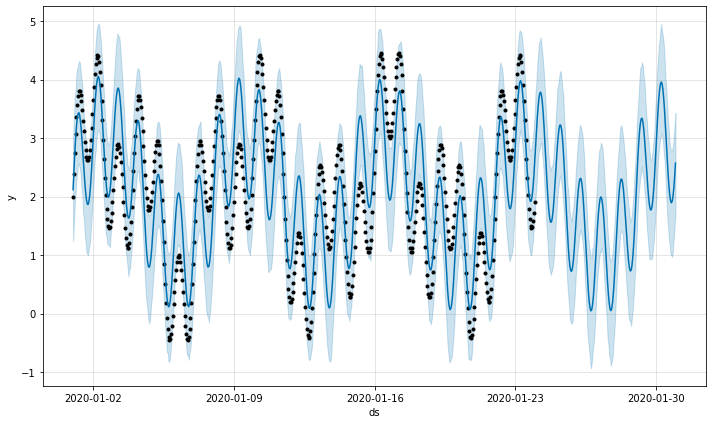

In [6]:
forecast_days = 7
df = pd.DataFrame({'ds': pd.date_range('2020-01-01', '2020-01-31', freq='1H', closed='left')})
df['y'] = 2.0

spectrum = [1, 3, 7]

def f(i, row, period_day=1):
    c = 2 * pi / (period_day * 24)
    return sin(c * i)

for i, row in df.iterrows():
    gt = row['y'] + sum([f(i, row, period) for period in spectrum])
    if i < len(df) - forecast_days * 24:
        y = gt
    else:
        y = None
    df.at[i, 'y'] = y
    df.at[i, 'gt'] = gt

df_train = df.dropna()

model = Prophet()
model.fit(df_train)

df_predict = df[['ds']]
df_predict = model.predict(df_predict)[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

df_cross = df.tail(forecast_days*24).merge(right=df_predict, on='ds', suffixes=['', '_predict'])
df_cross = df_cross[['ds', 'gt', 'yhat']]

mape = mean([2 * abs((row['gt'] - row['yhat']) / (row['gt'] + row['yhat']))
             for _, row in df_cross.iterrows()])
print('MAPE = %.3f' % mape)

fig = model.plot(df_predict)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


MAPE = 0.033


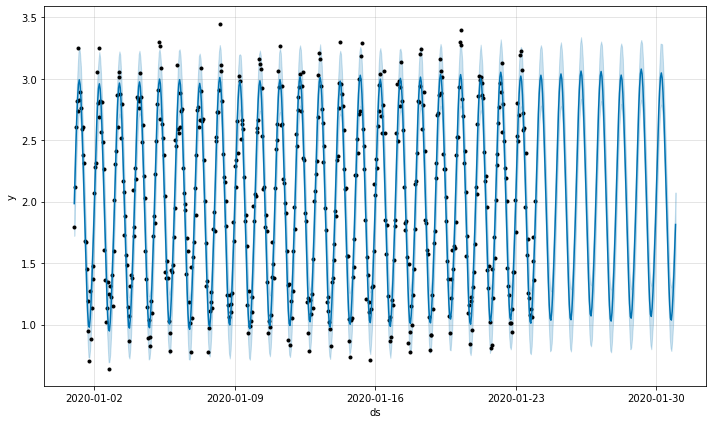

In [7]:
forecast_days = 7
df = pd.DataFrame({'ds': pd.date_range('2020-01-01', '2020-01-31', freq='1H', closed='left')})
df['y'] = 2.0
sigma = 0.2

spectrum = [1]

def f(i, row, period_day=1):
    c = 2 * pi / (period_day * 24)
    return sin(c * i)

for i, row in df.iterrows():
    gt = row['y'] + sum([f(i, row, period) for period in spectrum])
    if i < len(df) - forecast_days * 24:
        y = gt + gauss(mu=0, sigma=sigma)
    else:
        y = None
    df.at[i, 'y'] = y
    df.at[i, 'gt'] = gt

df_train = df.dropna()

model = Prophet()
model.fit(df_train)

df_predict = df[['ds']]
df_predict = model.predict(df_predict)[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

df_cross = df.tail(forecast_days*24).merge(right=df_predict, on='ds', suffixes=['', '_predict'])
df_cross = df_cross[['ds', 'gt', 'yhat']]

mape = mean([2 * abs((row['gt'] - row['yhat']) / (row['gt'] + row['yhat']))
             for _, row in df_cross.iterrows()])
print('MAPE = %.3f' % mape)

fig = model.plot(df_predict)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


MAPE = 0.000


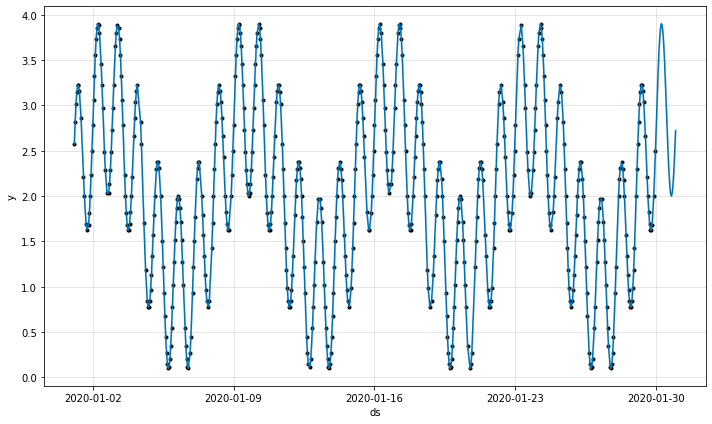

In [8]:
forecast_days = 1
df = pd.DataFrame({'ds': pd.date_range('2020-01-01', '2020-01-31', freq='1H', closed='left')})
df['y'] = 2.0

spectrum = [1, 7]

def f(i, row, period_day=1):
    c = 2 * pi / (period_day * 24)
    return sin(c * i)

for i, row in df.iterrows():
    gt = row['y'] + sum([f(i, row, period) for period in spectrum])
    if i < len(df) - forecast_days * 24:
        y = gt
    else:
        y = None
    df.at[i, 'y'] = y
    df.at[i, 'gt'] = gt

drop_ratio = 0.2
drop_inds = [i for i in range(len(df)) if random() < drop_ratio and i < len(df) - forecast_days * 24]
df = df.drop(df.index[drop_inds])

df_train = df.dropna()

model = Prophet()
model.fit(df_train)

df_predict = df[['ds']]
df_predict = model.predict(df_predict)[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

df_cross = df.tail(forecast_days*24).merge(right=df_predict, on='ds', suffixes=['', '_predict'])
df_cross = df_cross[['ds', 'gt', 'yhat']]

mape = mean([2 * abs((row['gt'] - row['yhat']) / (row['gt'] + row['yhat']))
             for _, row in df_cross.iterrows()])
print('MAPE = %.3f' % mape)

fig = model.plot(df_predict)